In [1]:
'''
AI model:
Train AI with states as features and moves from solved (0-20) as labels

Solver:
For each state, do
(0. Evaluate current state)
1. For each alg up to length k, evaluate state.
2. Pick the n "best" algs from step 1, and repeat step (0)1-2 for from the state caused by applying the first move
(3.) Table look up for all algs of length m (=5/6/7)
'''

'\nAI model:\nTrain AI with states as features and moves from solved (0-20) as labels\n\nSolver:\nFor each state, do\n(0. Evaluate current state)\n1. For each alg up to length k, evaluate state.\n2. Pick the n "best" algs from step 1, and repeat step (0)1-2 for from the state caused by applying the first move\n(3.) Table look up for all algs of length m (=5/6/7)\n'

In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F

import random
import time

In [1]:
%run ../cube/Cube.ipynb

Support algs imported!
Cube initiated


In [4]:
def cube_to_tensor(cube):
    '''
    removes center stickers
    '''
    state = cube.state.tolist()
    short_state = state[0:4]
    short_state += state[5:13]
    short_state += state[14:22]
    short_state += state[23:31]
    short_state += state[32:40]
    short_state += state[41:49]
    short_state += state[50:54]
    return torch.from_numpy(np.array(short_state, dtype=np.float32))

def cube_to_tensor_2(cube, long_repr = True):
    '''
    removes center stickers, top corners
    (should I remove 1 whole corner and 3 edge stickers as well?)
    '''
    state = cube.state.tolist()
    short_state = state[0:4]
    short_state += state[5:13]
    short_state += state[14:22]
    short_state += state[23:31]
    short_state += state[32:36]
    short_state += [state[37],state[39],state[41],state[43],state[46],state[48],state[50],state[52]]
    if long_repr:
        long_state = np.zeros(len(short_state)*6)
        for i in range(len(short_state)):
            long_state[6*i:6*i+6] = np.array([0]*(short_state[i]-1) + [1] + [0]*(6-short_state[i]))
        return torch.from_numpy(np.array(long_state, dtype=np.float32))
    return torch.from_numpy(np.array(short_state, dtype=np.float32))

cube = Cube(0)
print(cube)
cube_to_tensor_2(cube)

       5 5 5
       5 5 5
       5 5 5
4 4 4  1 1 1  2 2 2  3 3 3
4 4 4  1 1 1  2 2 2  3 3 3
4 4 4  1 1 1  2 2 2  3 3 3
       6 6 6
       6 6 6
       6 6 6



tensor([1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
        1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
        1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
        0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
        0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
        0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
        0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
        0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
        0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0.,
        0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0.,
        0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0.,
        0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0.,
        0., 0., 0., 0., 0., 1., 0., 0., 

In [5]:
# Define a dataset (input-output pairs)
dataset = []
# Format: (torch.tensor([1,1,...,6,6]), torch.tensor([#moves])),
cube = Cube(0)
dataset.append((cube_to_tensor(cube),torch.tensor([0])))
for i in range(9999):
    alg = gen_random_alg(0)
    cube = Cube(0)
    cube.apply_moves(alg)
    dataset.append((cube_to_tensor(cube),torch.tensor([count_moves(alg)])))

# dataset
# dataset

In [6]:
def gen_random_length(exponent = 2, min_alg_length = 1,max_alg_length = 20):
    r = random.random()
    return int((max_alg_length - min_alg_length+1)*(1 - r**exponent) + min_alg_length)

In [7]:

# Define the network architecture
class SimpleNetwork(nn.Module):
    def __init__(self):
        super(SimpleNetwork, self).__init__()
        self.fc1 = nn.Linear(240, 1024)
#         self.fc2 = nn.Linear(512, 256)
#         self.fc3 = nn.Linear(256*, 128)
        self.fc4 = nn.Linear(1024, 256)
        self.fc5 = nn.Linear(256, 21)

    def forward(self, x):
        x = F.relu(self.fc1(x))
#         x = F.relu(self.fc2(x))
#         x = F.relu(self.fc3(x))
        x = F.relu(self.fc4(x))
        x = self.fc5(x)
        return x

# Create an instance of the network
network = SimpleNetwork()

In [8]:
# Train
# trains by making a "small" dataset and training on it 5 times. Repeat N times
# Define a loss function and optimizer
criterion = nn.MultiLabelSoftMarginLoss() #nn.CrossEntropyLoss()

optimizer = optim.Adam(network.parameters(), lr=0.005) #SDG
network.train()

N = 1000
dataset_size = 1000
num_epochs = 3
data_exp = 1.3
min_alg_length = 0
max_alg_length = 18
print(f"Training on {N}*{dataset_size} data points {num_epochs} times, totaling {N*dataset_size*num_epochs} data points.")
t = time.time()
for rep in range(N):
    # Define a dataset (input-output pairs)
    dataset = []
    cube = Cube(0)
    dataset.append((cube_to_tensor_2(cube),torch.tensor([0])))
    for i in range(dataset_size-1):
        length = gen_random_length(data_exp,min_alg_length,max_alg_length)
        alg = gen_random_alg(length)
        cube = Cube(0)
        cube.apply_moves(alg)
        dataset.append((cube_to_tensor_2(cube),torch.tensor([count_moves(alg)])))
    
    # Training loop
    for epoch in range(num_epochs):
        total_loss = 0.0
        i = 0
        for input_data, target in dataset:
            # Forward pass
            output = network(input_data)

            # Encode the target as class probabilities
            target_onehot = F.one_hot(target, num_classes=21).float().squeeze()

            # Compute the loss
            loss = criterion(output, target_onehot)

            # Backpropagation and optimization
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            total_loss += loss.item()
            i+=1

        # Print average loss for the epoch
        average_loss = total_loss / len(dataset)
        print(f"Epoch [{epoch+1}/{num_epochs}], Average Loss: {average_loss:.4f}")
    print(f"{rep+1}/{N} done, time elapsed since training start: {int(time.time()-t)}s")

network.eval()

Training on 1000*1000 data points 3 times, totaling 3000000 data points.


KeyboardInterrupt: 

In [70]:
# # Specify a path
# PATH = "nn_5.pt" #replace after use to not overwrite

# # Save
# torch.save(network.state_dict(), PATH)

In [259]:
network.eval()
def evalute_cube(cube):
    state_tensor = cube_to_tensor_2(cube)
    output = network(state_tensor)
    #output[torch.argmax(output, dim=0)]
    _, predicted_class = torch.max(output, dim=0)
    return predicted_class.item()

errors = []
lens = {}
N = 10000
for i in range(N):
    cube = Cube(0)
    length = gen_random_length(data_exp,min_alg_length,max_alg_length)
    alg = gen_random_alg(length)
    cube.apply_moves(alg)
    ev = evalute_cube(cube)
    cnt = count_moves(alg)
    if cnt in lens:
        lens[cnt].append(ev)
    else:
        lens[cnt] = [ev]
    errors.append(abs(ev - cnt))

# print(lens)

In [260]:
print(errors.count(0),errors.count(1),errors.count(0)/(errors.count(0)+errors.count(1)))

1911 1753 0.521561135371179


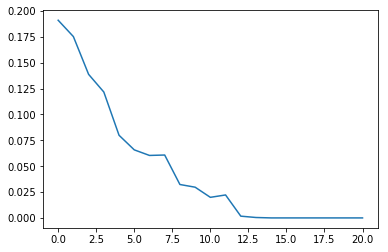

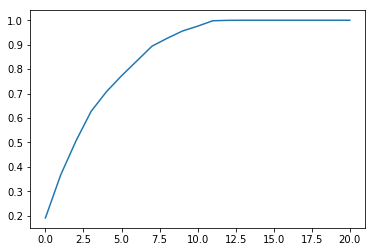

In [261]:
error_count = []
cumulative_error_count = [0]
for i in range(0,21):
    error_count.append(errors.count(i)/len(errors))
    cumulative_error_count.append(cumulative_error_count[i]+errors.count(i)/len(errors))

plt.plot(range(0,21),error_count)
plt.show()
plt.plot(range(0,21),cumulative_error_count[1:])
plt.show()

Algs of length 1:


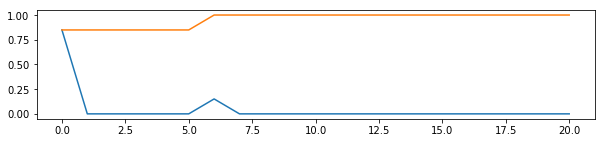

Algs of length 2:


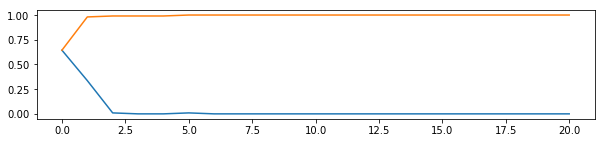

Algs of length 3:


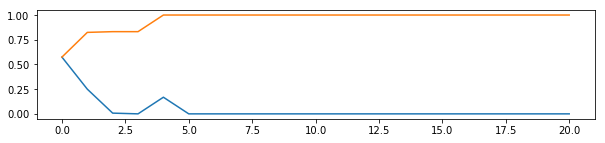

Algs of length 4:


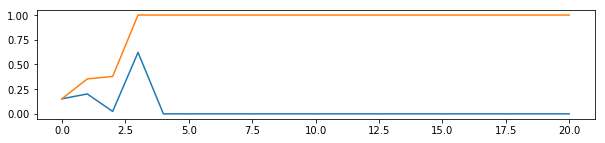

Algs of length 5:


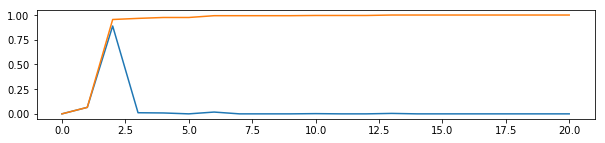

Algs of length 6:


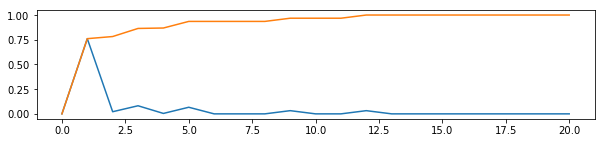

Algs of length 7:


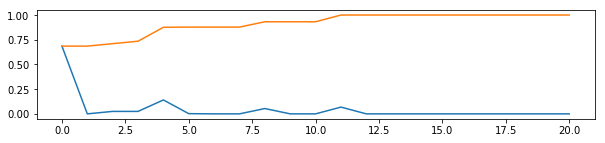

Algs of length 8:


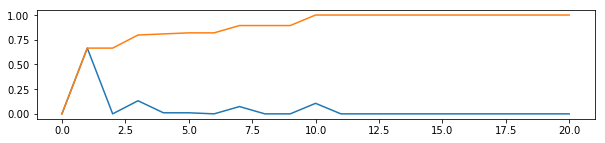

Algs of length 9:


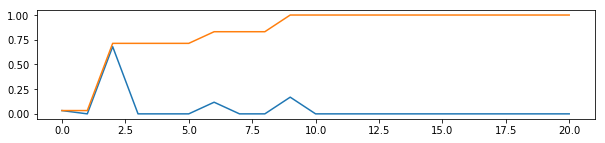

Algs of length 10:


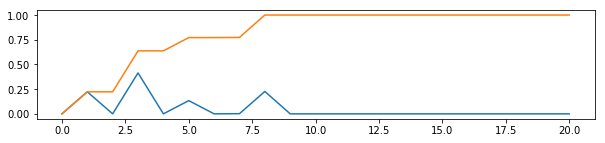

Algs of length 11:


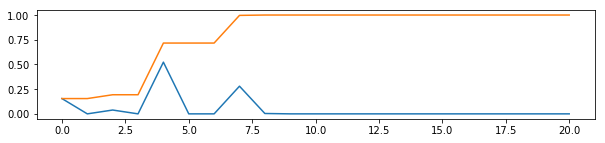

Algs of length 12:


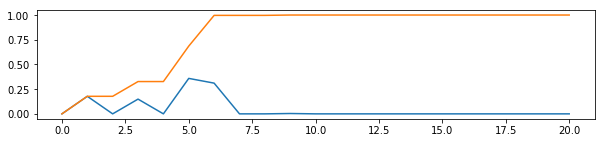

Algs of length 13:


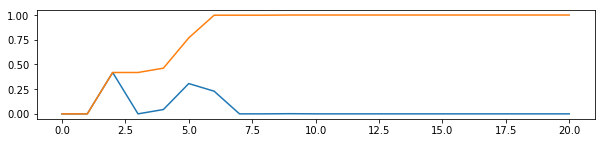

Algs of length 14:


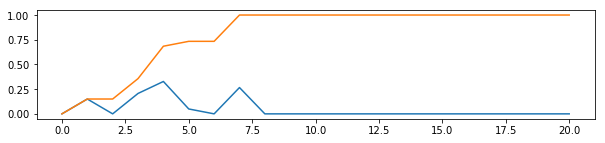

Algs of length 15:


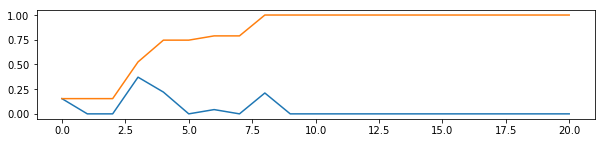

Algs of length 16:


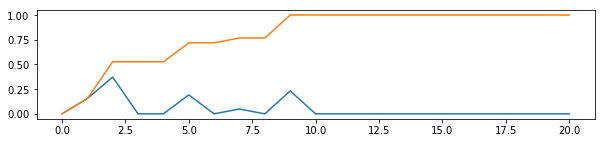

Algs of length 17:


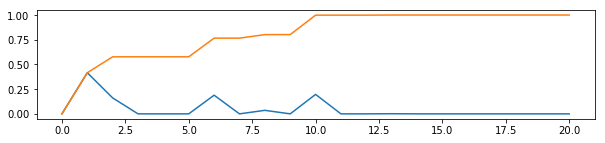

Algs of length 18:


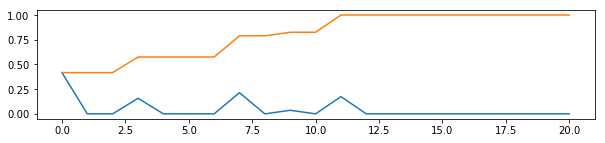

Algs of length 19:


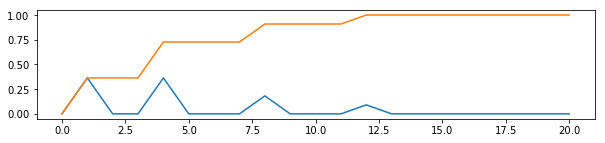

Algs of length 20:


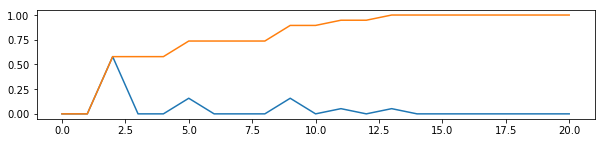

In [262]:
for j in range(1,21):
    errors_j = []
    for i in range(len(lens[j])):
        errors_j.append(abs(j - lens[j][i]))

    error_count_j = []
    cumulative_error_count_j = [0]
    for i in range(0,21):
        error_count_j.append(errors_j.count(i)/len(lens[j]))
        cumulative_error_count_j.append(cumulative_error_count_j[i]+errors_j.count(i)/len(lens[j]))
    print(f"Algs of length {j}:")
    plt.figure(figsize=(10, 2))
    plt.plot(range(0,21),error_count_j)
    plt.plot(range(0,21),cumulative_error_count_j[1:])
    plt.show()

In [27]:
# Define a new input tensor for evaluation
new_input = torch.rand(48) * 6  # Replace with your new input
# Perform forward pass to get the output
output = network(new_input)
print(output)
# Get the predicted class


_, predicted_class = torch.max(output, dim=0)
print(_)
print(float(output[torch.argmax(output, dim=0)]))
# Print the predicted class
print("Predicted Class:", predicted_class.item())

tensor([-3.9047, -5.6856, -4.3847, -3.2946, -0.9380,  0.3522,  0.8806,  1.0279,
         1.0437,  1.3186,  1.3338,  1.0891,  1.1377,  1.3166,  1.1350,  1.1621,
         1.4267,  1.4046,  1.4035,  1.1651,  1.2192], grad_fn=<AddBackward0>)
tensor(1.4267, grad_fn=<MaxBackward0>)
1.4266903400421143
Predicted Class: 16


In [138]:
correct = 0
wrong = 0
alg_length = 11
N = 10000
for i in range(N):
    cube = Cube(0)
    alg = gen_random_alg(alg_length)
    cube.apply_moves(alg)
    ev = evalute_cube(cube)
    if ev==alg_length:
        correct+=1
    else:
        wrong+=1
print(f"Algs of length {alg_length}: {correct}/{N}={100*correct/N}% correct")

Algs of length 11: 0/10000=0.0% correct


In [154]:
scrambles = ["F' D2 L2 U2 F' L2 D2 R2 U2 F D2 U F2 L D' U' L B L R","F2 U' B2 L2 U B2 R2 D' U' B2 L2 B' D U2 B' F2 R' U L' D' R2","R U F U D' B L' B2 L U F2 B2 U B2 U F2 U R2 F2 L2 U","U' F2 D2 U' R2 B2 R2 B2 U' R2 D2 F' R U2 B' R D' U R' U2 B","L B' D R' L2 F2 L' U' R L2 U2 L' F2 R U2 R' D2 R F2"]
for i,scramble in enumerate(scrambles):
    print(i+1,scramble)

1 F' D2 L2 U2 F' L2 D2 R2 U2 F D2 U F2 L D' U' L B L R
2 F2 U' B2 L2 U B2 R2 D' U' B2 L2 B' D U2 B' F2 R' U L' D' R2
3 R U F U D' B L' B2 L U F2 B2 U B2 U F2 U R2 F2 L2 U
4 U' F2 D2 U' R2 B2 R2 B2 U' R2 D2 F' R U2 B' R D' U R' U2 B
5 L B' D R' L2 F2 L' U' R L2 U2 L' F2 R U2 R' D2 R F2


1 genned in 0.0
2 genned in 0.008957386016845703
Scramble: F' D2 L2 U2 F' L2 D2 R2 U2 F D2 U F2 L D' U' L B L R
Final Solution (7): L B  (3)


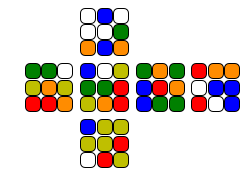

Scramble: F2 U' B2 L2 U B2 R2 D' U' B2 L2 B' D U2 B' F2 R' U L' D' R2
Final Solution (7): U2  (2)


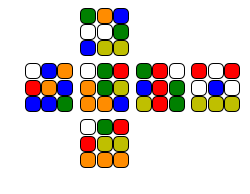

Scramble: R U F U D' B L' B2 L U F2 B2 U B2 U F2 U R2 F2 L2 U
Final Solution (7): U'  (2)


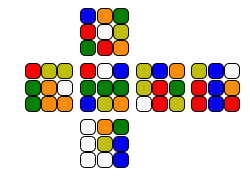

Scramble: U' F2 D2 U' R2 B2 R2 B2 U' R2 D2 F' R U2 B' R D' U R' U2 B
Final Solution (7): F2  (2)


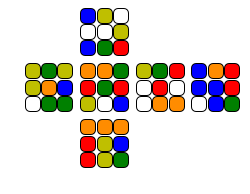

Scramble: L B' D R' L2 F2 L' U' R L2 U2 L' F2 R U2 R' D2 R F2
Final Solution (7):  (1)


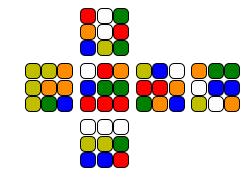

In [263]:
def test_solver(cube, all_algs, prnt = True):
    '''
    gen all algs up to length n
    for each iteration:
        evaluates state
        go through all algs and evaluate state
        choose the one who improves the state the most and apply the first move 
        break loop when no improvements are being made
        
    '''
    solution = ""
    while True:
        if prnt:
            print(solution,evalute_cube(cube))
        best_eval = evalute_cube(cube)
        best_alg = ""
        for alg in all_algs:
            inv = inverse_alg(alg)
            cube.apply_moves(alg)
            new_eval = evalute_cube(cube)
            if new_eval < best_eval:
                best_eval = new_eval
                best_alg = alg
            cube.apply_moves(inv)
        if best_eval >= evalute_cube(cube):
            break
        move = best_alg.split(" ")[0]
        cube.apply_moves(move)
        solution += move+" "
    print(f"Final Solution ({evalute_cube(cube)}): {solution} ({count_moves(solution)})")
    return solution,evalute_cube(cube)

n = 2
all_algs = gen_all_algs(n)
for scramble in scrambles:
    cube = Cube(0)
    cube.apply_moves(scramble)
    print("Scramble:",scramble)
    sol = test_solver(cube, all_algs, False)
    cube.plot()

In [752]:
cube = Cube(0)
cube.apply_moves("R2 U L F B' D L2 U2 L2 F'")

evalute_cube(cube)

2

In [575]:
lst = []
for i in range(10000):
    r = random.random()
    lst.append(int(20*(1-r**2)+1))

In [577]:
for i in range(20):
    print(i+1,lst.count(i+1))

1 241
2 265
3 257
4 263
5 284
6 283
7 327
8 335
9 322
10 357
11 306
12 380
13 411
14 412
15 512
16 523
17 586
18 709
19 953
20 2274
